In [1]:
from classification_algorithms.logistic_regression import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### create data and plot data

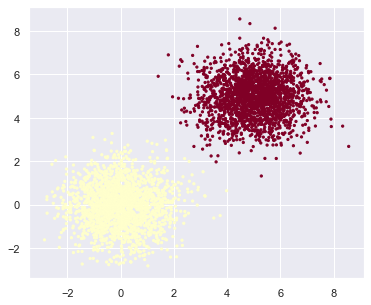

In [2]:
# create data
x1 = np.random.normal(loc=0, scale=1, size=(2000, 2))
x2 = np.random.normal(loc=5, scale=1, size=(2000, 2))
X = np.vstack((x1, x2))
y = np.vstack((np.zeros(x1.shape), np.ones(x2.shape)))[:, 0]
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'y': y})
df = df.sample(frac=1, random_state=41).reset_index(drop=True)
# plot data points
plt.figure(figsize=(6, 5))
plt.scatter(df.x1, df.x2, cmap='YlOrRd', c=df.y, s=5)
plt.show()

### split data and plot data

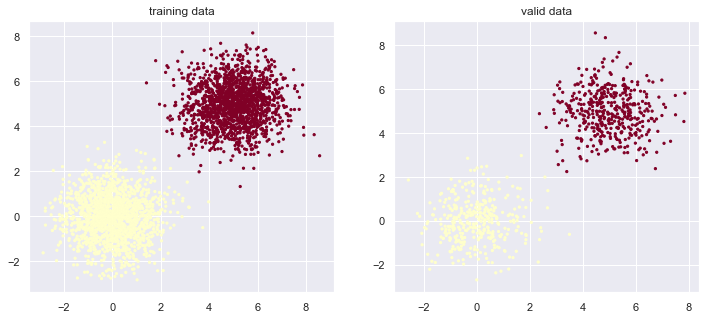

In [3]:
x_train, x_valid, y_train, y_valid = train_test_split(df.to_numpy()[:, :-1], df.to_numpy()[:, -1], test_size=0.2, random_state=41)
# plot data points
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], cmap='YlOrRd', c=y_train, s=5)
plt.title('training data')
plt.subplot(122)
plt.scatter(x_valid[:,0], x_valid[:,1], cmap='YlOrRd', c=y_valid, s=5)
plt.title('valid data')
plt.show()

### logistic regression

Epoch: 0, train error: 0.2469, valid error: 0.2565
Epoch: 240, train error: 0.0458, valid error: 0.0432
Epoch: 480, train error: 0.0318, valid error: 0.0302
Epoch: 720, train error: 0.0248, valid error: 0.0237
Epoch: 960, train error: 0.0205, valid error: 0.0197


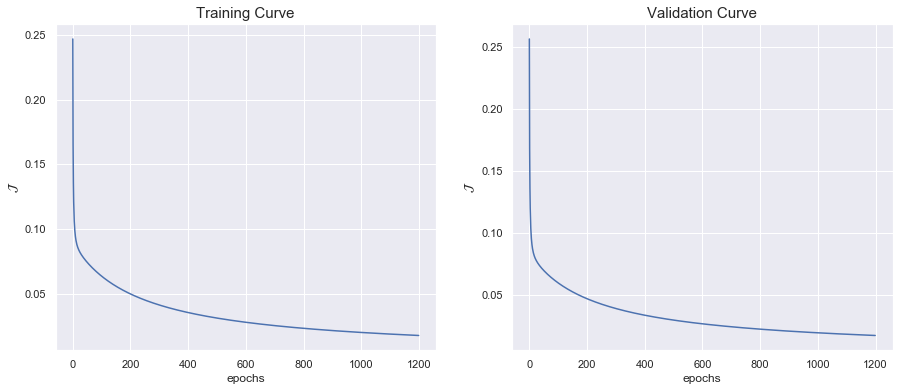

In [4]:
logreg = LogisticRegression(df.shape[1]-1)
loss = logreg.fit(x_train, y_train, x_valid, y_valid, epochs=1200, show_curve=True)

In [5]:
x1 = np.linspace(x_train[:,0].min(), x_train[:,0].max(), 100)
x2 = np.linspace(x_train[:,1].min(), x_train[:,1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
y_hat = logreg.predict(np.c_[x1.flatten(), x2.flatten()])

### use logistic regression plot boundary

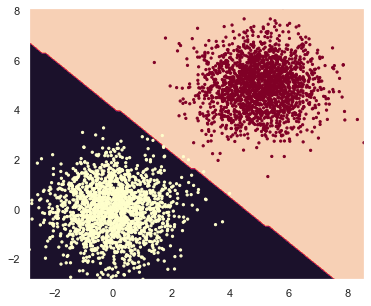

In [6]:
plt.figure(figsize=(6, 5))
plt.contourf(x1, x2, y_hat.reshape(x1.shape))
plt.scatter(df.x1, df.x2, cmap='YlOrRd', c=df.y, s=5)
plt.xlim([x_train[:,0].min(), x_train[:,0].max()])
plt.ylim([x_train[:,1].min(), x_train[:,1].max()])
plt.show()